# Reading data

In [1]:
import pandas as pd

In [113]:
df = pd.read_csv("customer_churn.csv")

In [114]:
target_column =  "Churn"
features = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value']

In [115]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


# Data visualization

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
#Imports

In [117]:
feature = "Status"
a = df[feature].value_counts()
a.index.tolist()

[1, 2]

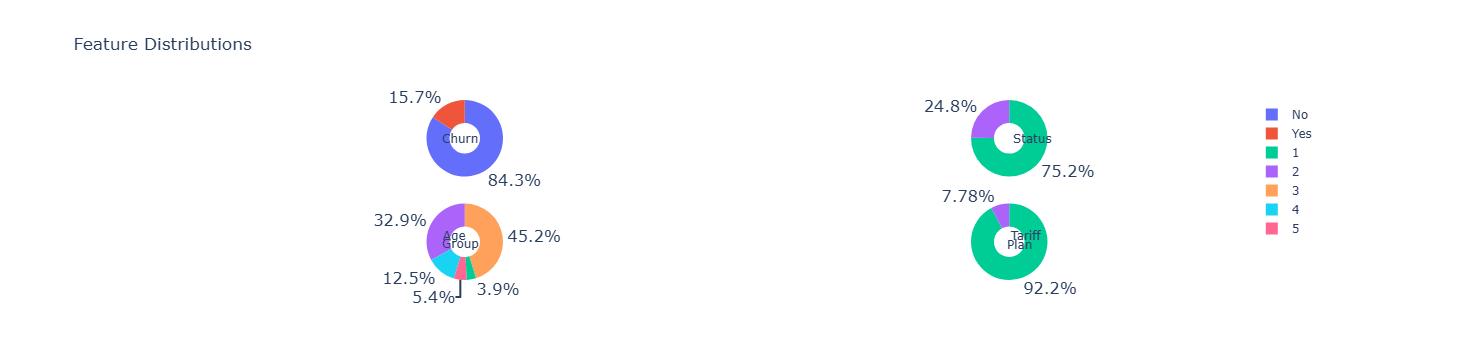

In [118]:
churn_labels = ['No', 'Yes']
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=churn_labels, values=df['Churn'].value_counts(), name="Churn"), 1, 1)


def add_trace(feature, row, col):
    values = df[feature].value_counts()
    labels = values.index.tolist()
    fig.add_trace(go.Pie(labels=labels, values=values, name=feature), row, col)
add_trace("Status", 1, 2)
add_trace("Age Group", 2, 1)
add_trace("Tariff Plan", 2, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Feature Distributions",
    annotations=[dict(text="Churn", x=0.2, y=0.84, font_size=12, showarrow=False),
                 dict(text="Status", x=0.82, y=0.84, font_size=12, showarrow=False),
                 dict(text="Age", x=0.2, y=0.195, font_size=12, showarrow=False),
                 dict(text="Group", x=0.2, y=0.15, font_size=12, showarrow=False),
                 dict(text="Tariff", x=0.81, y=0.195, font_size=12, showarrow=False),
                 dict(text="Plan", x=0.8, y=0.145, font_size=12, showarrow=False)])
fig.show()

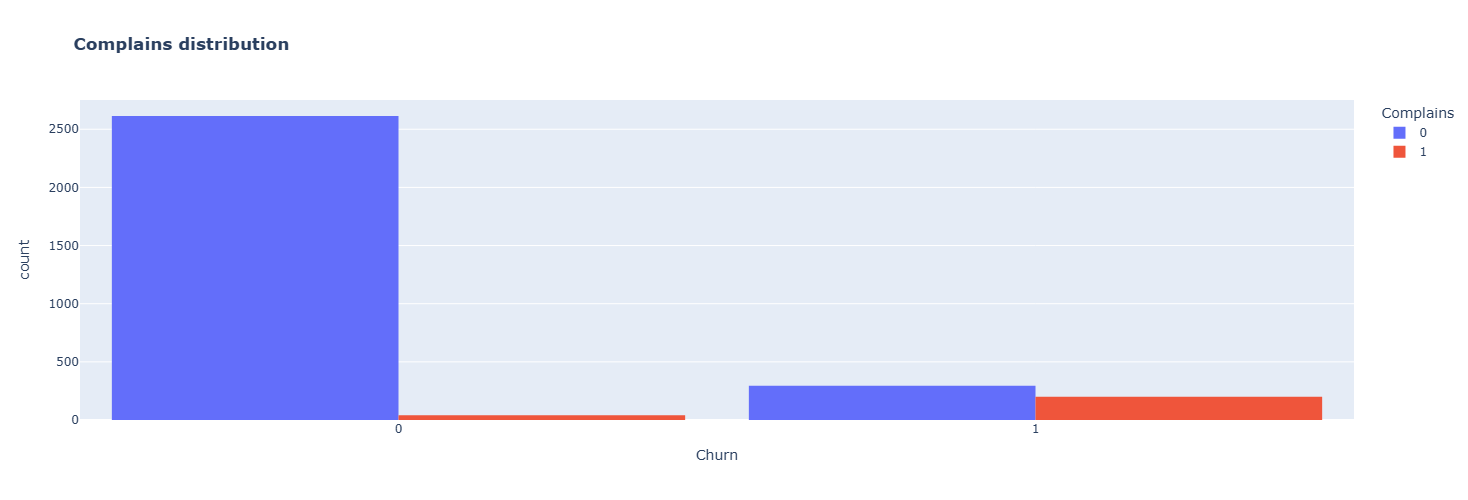

In [119]:
def create_histogram(feature):
    fig = px.histogram(df, x="Churn", color=feature, barmode="group", title=f"<b>{feature} distribution<b>")
    fig.update_layout(width=700, height=500, bargap=0.1)
    fig.show()
create_histogram("Complains")

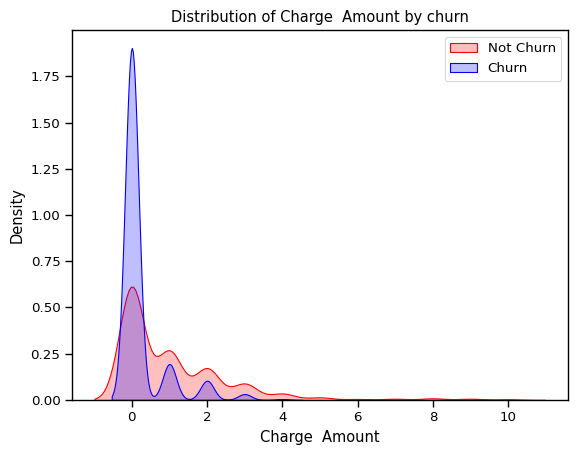

In [120]:
feature = 'Charge  Amount'
def continuous_plot(feature):
    sns.set_context("paper",font_scale=1.1)
    ax = sns.kdeplot(df[feature][(df["Churn"] == 0) ],
                    color="Red", shade = True);
    ax = sns.kdeplot(df[feature][(df["Churn"] == 1) ],
                    ax =ax, color="Blue", shade= True);
    ax.legend(["Not Churn","Churn"],loc='upper right');
    ax.set_ylabel("Density");
    ax.set_xlabel(feature);
    ax.set_title(f'Distribution of {feature} by churn');
continuous_plot('Charge  Amount')

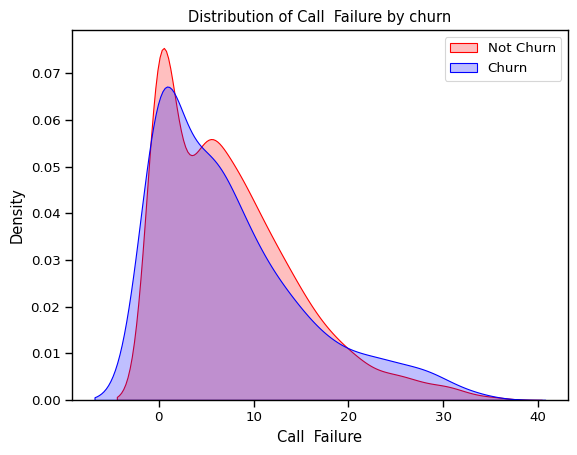

In [121]:
continuous_plot('Call  Failure')

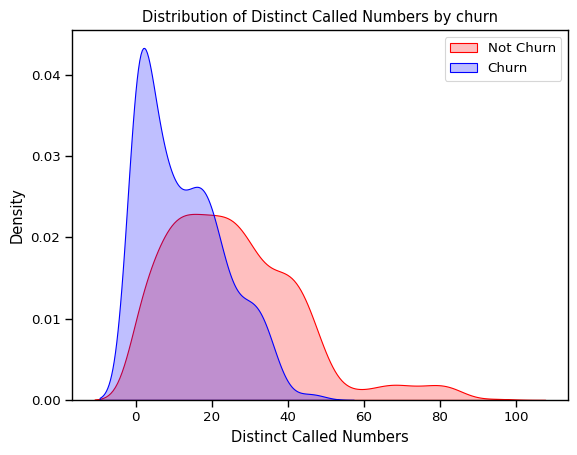

In [122]:
continuous_plot('Distinct Called Numbers')

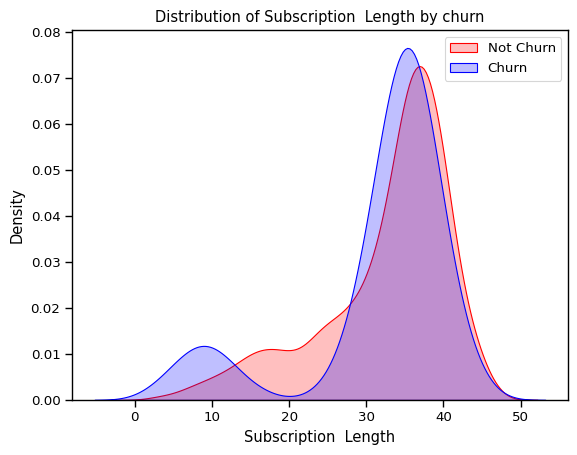

In [123]:
continuous_plot('Subscription  Length')

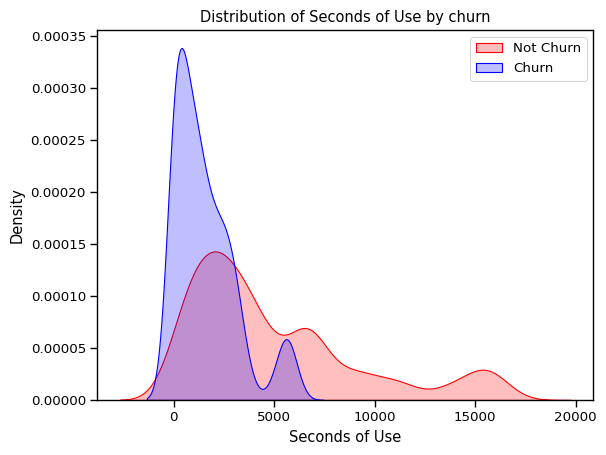

In [124]:
continuous_plot('Seconds of Use')

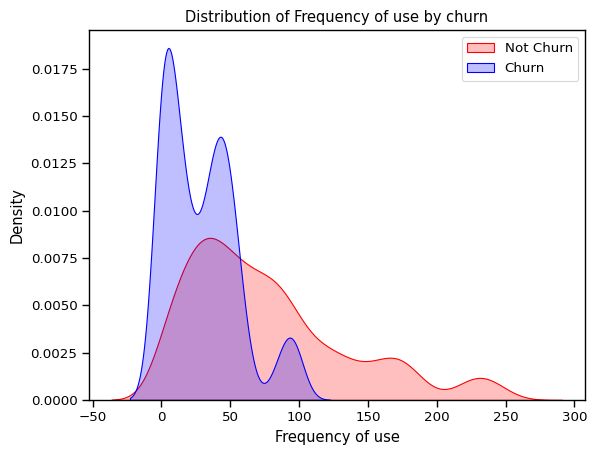

In [125]:
continuous_plot('Frequency of use')

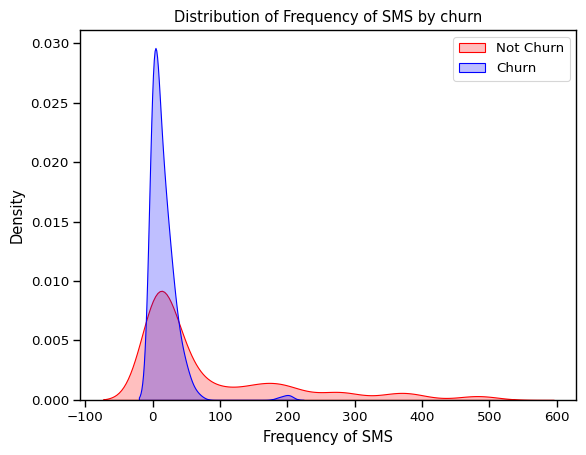

In [126]:
continuous_plot('Frequency of SMS')

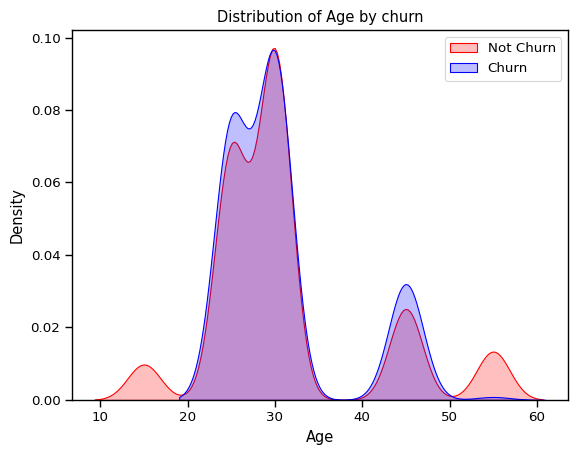

In [127]:
continuous_plot('Age')

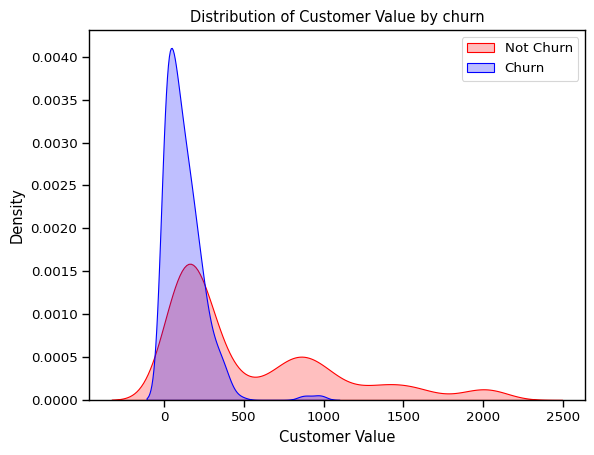

In [128]:
continuous_plot('Customer Value')

# Data Cleaning

In [129]:
import missingno as msno

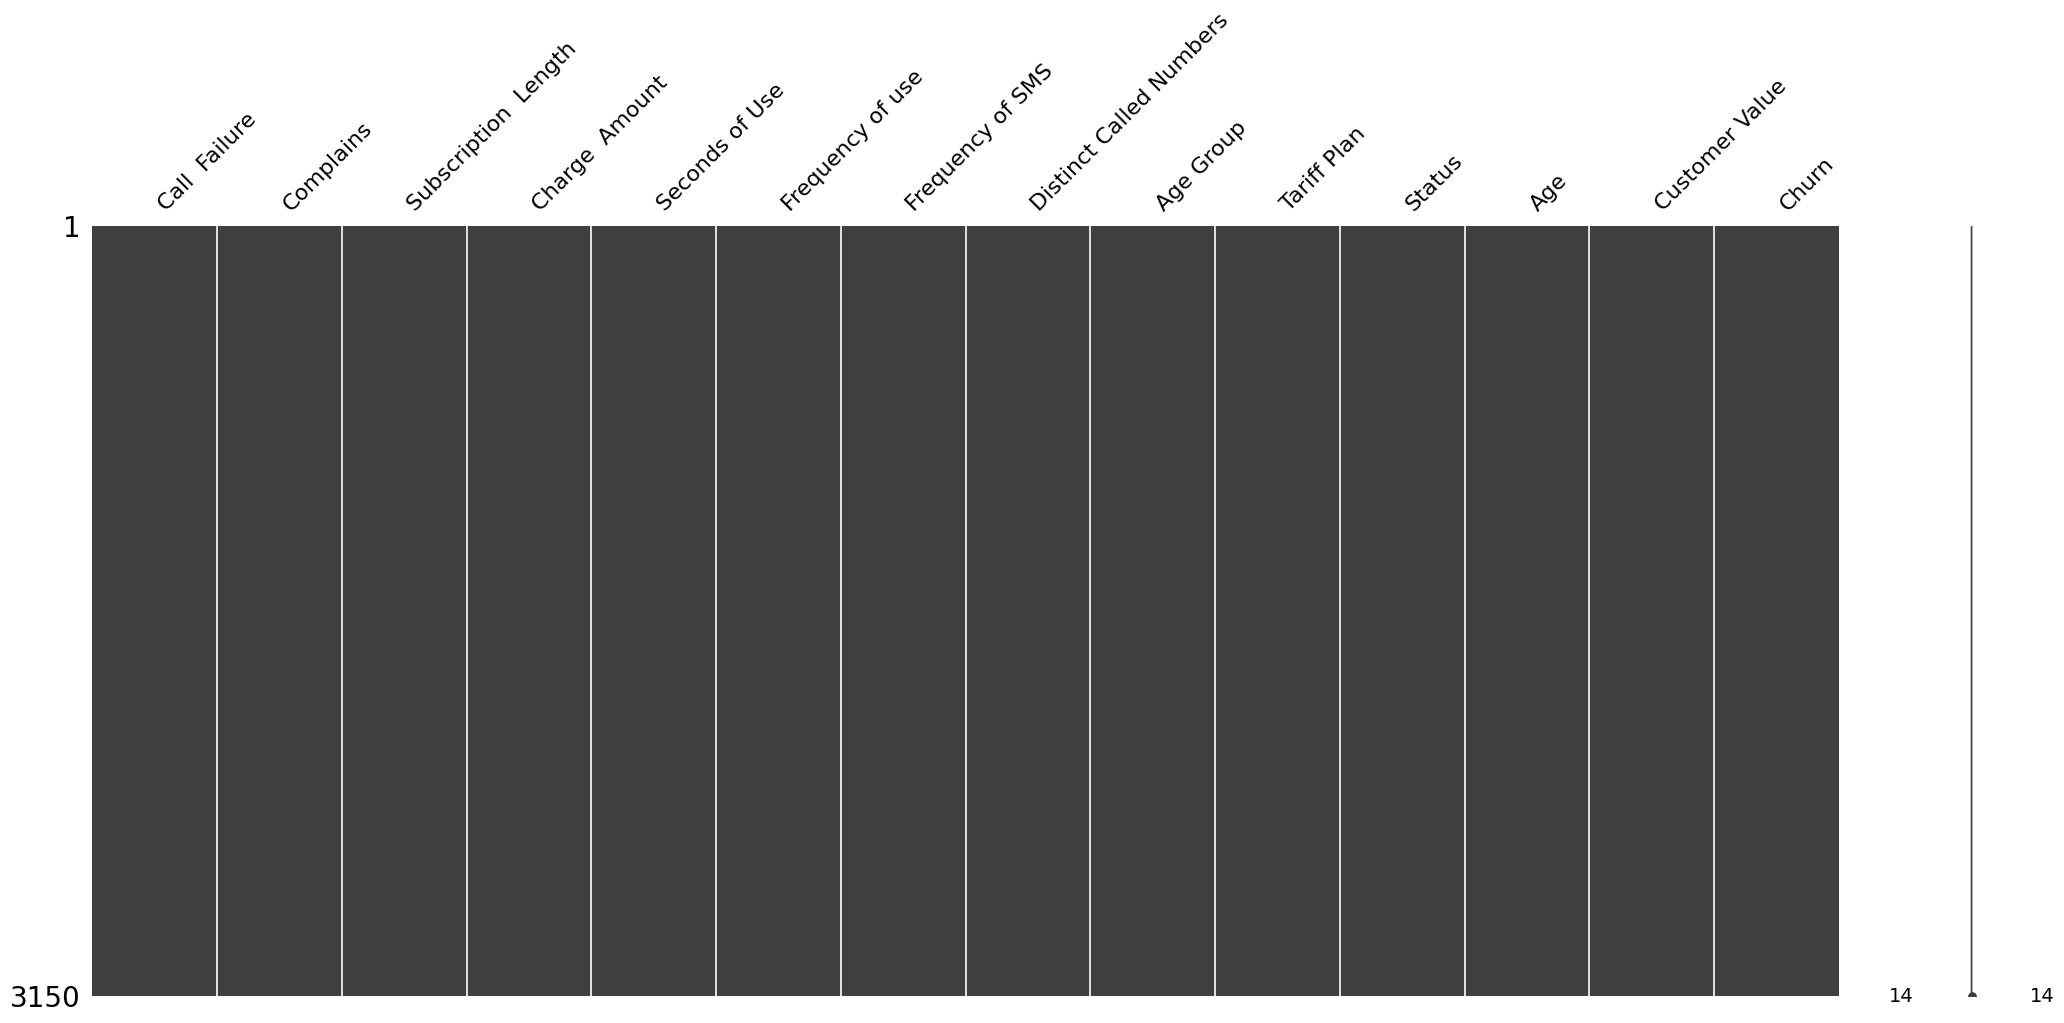

In [130]:
msno.matrix(df);

# Data preprocessing

In [133]:
for feat in features:
    df[feat] = pd.to_numeric(df[feat], errors='coerce')

In [134]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [136]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


## Test Train split

In [143]:
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Standardizing numerical values

In [144]:
from sklearn.preprocessing import StandardScaler
num_cols = ["Customer Value"]
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Modeling

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, accuracy_score, roc_curve

In [147]:
from sklearn.model_selection import GridSearchCV

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [157]:
models = {
        "Logistic Regression": {
            "model": LogisticRegression(),
            "params": {
                "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                "multi_class": ['auto', 'ovr', 'multinomial'],
                "l1_ratio": [i/10 for i in range(0, 11, 1)],
                "penalty": ['l1', 'l2', 'elasticnet']
            }
        },
        "Decision Tree": {
            "model": DecisionTreeClassifier(),
            "params": {
                'criterion':['gini','entropy'],
                'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
            }
        }
    }

In [158]:
for model in models:
    print(f"Fitting {model}")
    model_handle = models[model]["model"]
    model_params = models[model]["params"]
    gcv = GridSearchCV(model_handle, models[model]["params"], cv=5, verbose = 1, n_jobs = -1).fit(X_train, y_train)
    models[model]["result"] = {
        "score": gcv.best_score_*100,
        "estimator": gcv.best_estimator_,
        "params": gcv.best_params_
    }

Fitting Logistic Regression
Fitting 5 folds for each of 594 candidates, totalling 2970 fits
Fitting Decision Tree
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [169]:
models["Logistic Regression"]["result"]["params"]

{'l1_ratio': 0.0,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [170]:
models["Decision Tree"]["result"]["params"]

{'criterion': 'gini', 'max_depth': 20}

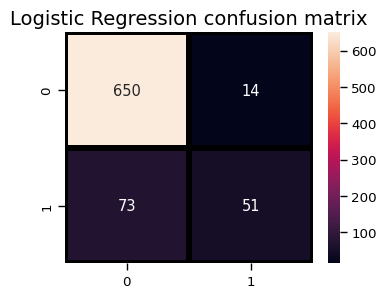

Accuracy:  88.95939086294416 %


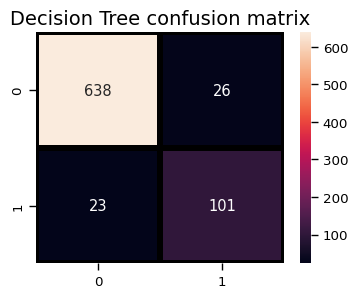

Accuracy:  93.78172588832487 %


In [171]:
for model_name in models:
    model = models[model_name]["result"]["estimator"]

    # Classification report
    pred = model.predict(X_test)
    report = classification_report(y_test, pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"{model_name} confusion matrix",fontsize=14)
    plt.show()
    
    # Accuracy
    print("Accuracy: ", accuracy_score(y_test, pred)*100, "%")